# 19CSE304 Data Science Final Assignment

# Duppala vijaya raghava

# CB.EN.U4CSE20218

# CSE-C

A) Data Manipulation - Pandas

Q1)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn
seaborn.set()
%matplotlib inline

In [ ]:
population=pd.read_csv("https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-population.csv")
area=pd.read_csv("https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-areas.csv")
abbrevs=pd.read_csv("https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-abbrevs.csv")

Final = pd.merge(population, abbrevs, how='outer',left_on='state/region', right_on='abbreviation')
Final.head()

,state/region,ages,year,population,state,abbreviation
0,AL,under18,2012,1117489.0,Alabama,AL
1,AL,total,2012,4817528.0,Alabama,AL
2,AL,under18,2010,1130966.0,Alabama,AL
3,AL,total,2010,4785570.0,Alabama,AL
4,AL,under18,2011,1125763.0,Alabama,AL


In [ ]:
Final.shape

(2544, 6)

# Indexing

In [ ]:
df=Final[Final['year']==2012]
df

,state/region,ages,year,population,state,abbreviation
0,AL,under18,2012,1117489.0,Alabama,AL
1,AL,total,2012,4817528.0,Alabama,AL
94,AK,under18,2012,188162.0,Alaska,AK
95,AK,total,2012,730307.0,Alaska,AK
96,AZ,under18,2012,1617149.0,Arizona,AZ
...,...,...,...,...,...,...
2401,WY,under18,2012,136526.0,Wyoming,WY
2494,PR,under18,2012,841740.0,NaN,NaN
2495,PR,total,2012,3651545.0,NaN,NaN
2542,USA,under18,2012,73708179.0,NaN,NaN


In [ ]:
Final.loc[(Final['ages']=='under18') & (Final['state']=='Alaska')]

,state/region,ages,year,population,state,abbreviation
49,AK,under18,1990,177502.0,Alaska,AK
51,AK,under18,1991,182180.0,Alaska,AK
52,AK,under18,1992,184878.0,Alaska,AK
54,AK,under18,1994,187439.0,Alaska,AK
57,AK,under18,1993,187190.0,Alaska,AK
59,AK,under18,1995,184990.0,Alaska,AK
61,AK,under18,1996,185360.0,Alaska,AK
62,AK,under18,1997,188280.0,Alaska,AK
63,AK,under18,1998,192636.0,Alaska,AK
66,AK,under18,1999,191422.0,Alaska,AK


In [ ]:
Final.iloc[:,[2,3]]

,year,population
0,2012,1117489.0
1,2012,4817528.0
2,2010,1130966.0
3,2010,4785570.0
4,2011,1125763.0
...,...,...
2539,2010,309326295.0
2540,2011,73902222.0
2541,2011,311582564.0
2542,2012,73708179.0


# Drop Duplicate

In [ ]:
Final=Final.drop('abbreviation',1)
Final.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_15752\821919760.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  Final=Final.drop('abbreviation',1)


,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama


# Check Null

In [ ]:
Final.isna().any()

state/region    False
ages            False
year            False
population       True
state            True
dtype: bool

In [ ]:
Final[Final['state'].isna()].head()

,state/region,ages,year,population,state
2448,PR,under18,1990,NaN,NaN
2449,PR,total,1990,NaN,NaN
2450,PR,total,1991,NaN,NaN
2451,PR,under18,1991,NaN,NaN
2452,PR,total,1993,NaN,NaN


In [ ]:
Final.loc[Final['state/region'] == 'PR', 'state'] = 'Puerto Rico'
Final.loc[Final['state/region'] == 'USA', 'state'] = 'United States'
Final.isnull().any()

state/region    False
ages            False
year            False
population       True
state           False
dtype: bool

In [ ]:
final = pd.merge(Final, area, on='state', how='left')
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [ ]:
final.isna().any()

state/region     False
ages             False
year             False
population        True
state            False
area (sq. mi)     True
dtype: bool

In [ ]:
final['state'][final['area (sq. mi)'].isnull()].unique()

array(['United States'], dtype=object)

In [ ]:
final.dropna(inplace=True)
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [ ]:
final.isna().any()

state/region     False
ages             False
year             False
population       False
state            False
area (sq. mi)    False
dtype: bool

# Aggregation

In [ ]:
final.describe()

,year,population,area (sq. mi)
count,2476.000000,2.476000e+03,2476.000000
mean,2001.556543,3.482132e+06,73452.686591
std,6.917905,4.986552e+06,94687.159589
min,1990.000000,1.013090e+05,68.000000
25%,1996.000000,7.306692e+05,35387.000000
50%,2002.000000,1.557804e+06,56276.000000
75%,2008.000000,4.373440e+06,84904.000000
max,2013.000000,3.833252e+07,656425.000000


In [ ]:
final['population'].sum()

8621759560.0

In [ ]:
final['area (sq. mi)'].sum()

181868852.0

In [ ]:
final.mad()

year             5.991466e+00
population       3.126783e+06
area (sq. mi)    4.740079e+04
dtype: float64

In [ ]:
final.var()

C:\Users\HP\AppData\Local\Temp\ipykernel_15752\3203347056.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  final.var()


year             4.785741e+01
population       2.486570e+13
area (sq. mi)    8.965658e+09
dtype: float64

# Merge And Join

In [ ]:
a=pd.DataFrame(population)
b=pd.DataFrame(area)
c=pd.DataFrame(abbrevs)
merged_final=pd.concat([a,b,c])
merged_final

,state/region,ages,year,population,state,area (sq. mi),abbreviation
0,AL,under18,2012.0,1117489.0,NaN,NaN,NaN
1,AL,total,2012.0,4817528.0,NaN,NaN,NaN
2,AL,under18,2010.0,1130966.0,NaN,NaN,NaN
3,AL,total,2010.0,4785570.0,NaN,NaN,NaN
4,AL,under18,2011.0,1125763.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
46,NaN,NaN,NaN,NaN,Virginia,NaN,VA
47,NaN,NaN,NaN,NaN,Washington,NaN,WA
48,NaN,NaN,NaN,NaN,West Virginia,NaN,WV
49,NaN,NaN,NaN,NaN,Wisconsin,NaN,WI


# Grouping

In [ ]:
final

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0
...,...,...,...,...,...,...
2491,PR,under18,2010,896945.0,Puerto Rico,3515.0
2492,PR,under18,2011,869327.0,Puerto Rico,3515.0
2493,PR,total,2011,3686580.0,Puerto Rico,3515.0
2494,PR,under18,2012,841740.0,Puerto Rico,3515.0


In [ ]:
final.groupby('state').sum()

,year,population,area (sq. mi)
state,,,
Alabama,96072,1.342974e+08,2516304.0
Alaska,96072,1.998907e+07,31508400.0
Arizona,96072,1.602037e+08,5472288.0
Arkansas,96072,8.095872e+07,2552736.0
California,96072,1.042036e+09,7857936.0
Colorado,96072,1.309345e+08,4996800.0
Connecticut,96072,1.021652e+08,266112.0
Delaware,96072,2.390016e+07,93792.0
District of Columbia,96072,1.678336e+07,3264.0


In [ ]:
final.groupby('ages').sum()

,year,population,area (sq. mi)
ages,,,
total,2477927,6.892642e+09,90934426.0
under18,2477927,1.729118e+09,90934426.0


In [ ]:
final.groupby('ages').mean()

,year,population,area (sq. mi)
ages,,,
total,2001.556543,5.567562e+06,73452.686591
under18,2001.556543,1.396702e+06,73452.686591


In [ ]:
final.groupby('year').sum()

,population,area (sq. mi)
year,,
1990,313841326.0,7573768.0
1991,318293960.0,7573768.0
1992,323023408.0,7573768.0
1993,327513533.0,7573768.0
1994,331766762.0,7573768.0
1995,335751543.0,7573768.0
1996,339627803.0,7573768.0
1997,343567670.0,7573768.0
1998,347285522.0,7573768.0


In [ ]:
final.groupby('year').mean()

,population,area (sq. mi)
year,,
1990,3.076876e+06,74252.627451
1991,3.120529e+06,74252.627451
1992,3.166896e+06,74252.627451
1993,3.210917e+06,74252.627451
1994,3.252615e+06,74252.627451
1995,3.291682e+06,74252.627451
1996,3.329684e+06,74252.627451
1997,3.368310e+06,74252.627451
1998,3.404760e+06,74252.627451


# Transformation

In [ ]:
final.groupby('state').transform(lambda x:x-x.mean())

C:\Users\HP\AppData\Local\Temp\ipykernel_15752\2562119311.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  final.groupby('state').transform(lambda x:x-x.mean())


,year,population,area (sq. mi)
0,10.5,-1.680373e+06,0.0
1,10.5,2.019666e+06,0.0
2,8.5,-1.666896e+06,0.0
3,8.5,1.987708e+06,0.0
4,9.5,-1.672099e+06,0.0
...,...,...,...
2491,3.5,-1.470545e+06,0.0
2492,4.5,-1.498163e+06,0.0
2493,4.5,1.319090e+06,0.0
2494,5.5,-1.525750e+06,0.0


# Apply

In [ ]:
total=final['population'].sum()
proportion=[]
def Percentage(final):
  proportion.append(final['population']/total)
  return proportion
a=Percentage(final)
print(a)

[0       0.000130
1       0.000559
2       0.000131
3       0.000555
4       0.000131
          ...   
2491    0.000104
2492    0.000101
2493    0.000428
2494    0.000098
2495    0.000424
Name: population, Length: 2476, dtype: float64]


# Pivot

In [ ]:
final.pivot_table(index='ages',columns='year')

area (sq. mi)                                                          \
year             1990          1991          1992          1993          1994   
ages                                                                            
total    74252.627451  74252.627451  74252.627451  74252.627451  74252.627451   
under18  74252.627451  74252.627451  74252.627451  74252.627451  74252.627451   

                                                                               \
year             1995          1996          1997          1998          1999   
ages                                                                            
total    74252.627451  74252.627451  74252.627451  74252.627451  74252.627451   
under18  74252.627451  74252.627451  74252.627451  74252.627451  74252.627451   

         ...    population                                            \
year     ...          2004          2005          2006          2007   
ages     ...                                                           
total    ...  5.704465e+06  5.756499e+06  5.811252e+06  5.865658e+06   
under18  ...  1.429493e+06  1.433521e+06  1.437620e+06  1.442173e+06   

                                                                               \
year             2008          2009          2010          2011          2012   
ages                                                                            
total    5.920285e+06  5.971383e+06  6.020144e+06  6.062868e+06  6.106254e+06   
under18  1.443275e+06  1.443365e+06  1.442625e+06  1.437914e+06  1.433652e+06   

                       
year             2013  
ages                   
total    6.148922e+06  
under18  1.430768e+06  

[2 rows x 48 columns]

# B) Time Series

# Q2) 

In [1]:
path = "C/content/Fremont_Bridge_Bicycle_Counter.csvv"

In [ ]:
df = pd.read_csv(path)
df

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,08/01/2022 12:00:00 AM,23.0,7.0,16.0
1,08/01/2022 01:00:00 AM,12.0,5.0,7.0
2,08/01/2022 02:00:00 AM,3.0,0.0,3.0
3,08/01/2022 03:00:00 AM,5.0,2.0,3.0
4,08/01/2022 04:00:00 AM,10.0,2.0,8.0
...,...,...,...,...
87595,09/30/2022 07:00:00 PM,168.0,57.0,111.0
87596,09/30/2022 08:00:00 PM,73.0,33.0,40.0
87597,09/30/2022 09:00:00 PM,69.0,30.0,39.0
87598,09/30/2022 10:00:00 PM,51.0,10.0,41.0


In [ ]:
Dates = df["Date"]
df["Date"] = pd.to_datetime(Dates)

In [ ]:
df

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,2022-08-01 00:00:00,23.0,7.0,16.0
1,2022-08-01 01:00:00,12.0,5.0,7.0
2,2022-08-01 02:00:00,3.0,0.0,3.0
3,2022-08-01 03:00:00,5.0,2.0,3.0
4,2022-08-01 04:00:00,10.0,2.0,8.0
...,...,...,...,...
87595,2022-09-30 19:00:00,168.0,57.0,111.0
87596,2022-09-30 20:00:00,73.0,33.0,40.0
87597,2022-09-30 21:00:00,69.0,30.0,39.0
87598,2022-09-30 22:00:00,51.0,10.0,41.0


In [ ]:
df = df.set_index('Date')

In [ ]:
df['2015']

C:\Users\HP\AppData\Local\Temp\ipykernel_15752\3483409441.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2015']


,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2015-01-01 00:00:00,13.0,4.0,9.0
2015-01-01 01:00:00,27.0,4.0,23.0
2015-01-01 02:00:00,19.0,5.0,14.0
2015-01-01 03:00:00,6.0,0.0,6.0
2015-01-01 04:00:00,5.0,2.0,3.0
...,...,...,...
2015-12-31 19:00:00,23.0,10.0,13.0
2015-12-31 20:00:00,12.0,2.0,10.0
2015-12-31 21:00:00,16.0,8.0,8.0


In [ ]:
df['2015' : '2016']

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2015-01-01 00:00:00,13.0,4.0,9.0
2015-01-01 01:00:00,27.0,4.0,23.0
2015-01-01 02:00:00,19.0,5.0,14.0
2015-01-01 03:00:00,6.0,0.0,6.0
2015-01-01 04:00:00,5.0,2.0,3.0
...,...,...,...
2016-12-31 19:00:00,10.0,6.0,4.0
2016-12-31 20:00:00,9.0,3.0,6.0
2016-12-31 21:00:00,10.0,4.0,6.0


## Resample, shifting and windowing

In [ ]:
df_monthly = df.resample('M').mean()

In [ ]:
df_monthly

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-31,94.389368,48.511494,45.877874
2012-11-30,70.343056,36.197222,34.145833
2012-12-31,48.883065,25.010753,23.872312
2013-01-31,60.327957,30.793011,29.534946
2013-02-28,74.444940,38.538690,35.906250
...,...,...,...
2022-05-31,98.783602,40.392473,58.391129
2022-06-30,118.415278,47.611111,70.804167
2022-07-31,134.262097,54.848118,79.413978


In [ ]:
df.shift(100)

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2022-08-01 00:00:00,NaN,NaN,NaN
2022-08-01 01:00:00,NaN,NaN,NaN
2022-08-01 02:00:00,NaN,NaN,NaN
2022-08-01 03:00:00,NaN,NaN,NaN
2022-08-01 04:00:00,NaN,NaN,NaN
...,...,...,...
2022-09-30 19:00:00,211.0,71.0,140.0
2022-09-30 20:00:00,290.0,96.0,194.0
2022-09-30 21:00:00,478.0,162.0,316.0


In [ ]:
rolling = df.rolling(365, center=True)

In [ ]:
rolling

Rolling [window=365,center=True,axis=0,method=single]

## Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn
df = pd.read_csv(path)
df

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,08/01/2022 12:00:00 AM,23.0,7.0,16.0
1,08/01/2022 01:00:00 AM,12.0,5.0,7.0
2,08/01/2022 02:00:00 AM,3.0,0.0,3.0
3,08/01/2022 03:00:00 AM,5.0,2.0,3.0
4,08/01/2022 04:00:00 AM,10.0,2.0,8.0
...,...,...,...,...
87595,09/30/2022 07:00:00 PM,168.0,57.0,111.0
87596,09/30/2022 08:00:00 PM,73.0,33.0,40.0
87597,09/30/2022 09:00:00 PM,69.0,30.0,39.0
87598,09/30/2022 10:00:00 PM,51.0,10.0,41.0


<AxesSubplot:>

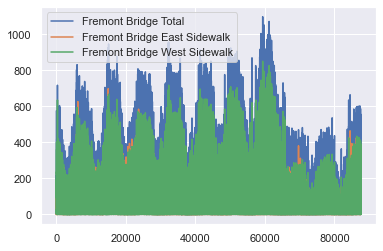

In [ ]:
df.plot()

In [ ]:
weekly = df.resample('W').sum()
weekly

In [ ]:
weekly.plot(style=[':' '.', '-'])

# Part B Question 3

In [ ]:
path = 'https://raw.githubusercontent.com/wangruinju/python-for-data-analysis/master/pydata-book-2nd-edition/examples/stock_px_2.csv'

In [ ]:
df = pd.read_csv(path)

In [ ]:
df

,Unnamed: 0,AAPL,MSFT,XOM,SPX
0,2003-01-02 00:00:00,7.40,21.11,29.22,909.03
1,2003-01-03 00:00:00,7.45,21.14,29.24,908.59
2,2003-01-06 00:00:00,7.45,21.52,29.96,929.01
3,2003-01-07 00:00:00,7.43,21.93,28.95,922.93
4,2003-01-08 00:00:00,7.28,21.31,28.83,909.93
...,...,...,...,...,...
2209,2011-10-10 00:00:00,388.81,26.94,76.28,1194.89
2210,2011-10-11 00:00:00,400.29,27.00,76.27,1195.54
2211,2011-10-12 00:00:00,402.19,26.96,77.16,1207.25
2212,2011-10-13 00:00:00,408.43,27.18,76.37,1203.66


## Indexing

In [ ]:
df[0:10]

,Unnamed: 0,AAPL,MSFT,XOM,SPX
0,2003-01-02 00:00:00,7.40,21.11,29.22,909.03
1,2003-01-03 00:00:00,7.45,21.14,29.24,908.59
2,2003-01-06 00:00:00,7.45,21.52,29.96,929.01
3,2003-01-07 00:00:00,7.43,21.93,28.95,922.93
4,2003-01-08 00:00:00,7.28,21.31,28.83,909.93
5,2003-01-09 00:00:00,7.34,21.93,29.44,927.57
6,2003-01-10 00:00:00,7.36,21.97,29.03,927.57
7,2003-01-13 00:00:00,7.32,22.16,28.91,926.26
8,2003-01-14 00:00:00,7.30,22.39,29.17,931.66
9,2003-01-15 00:00:00,7.22,22.11,28.77,918.22


In [ ]:
df['AAPL'][0:10]

0    7.40
1    7.45
2    7.45
3    7.43
4    7.28
5    7.34
6    7.36
7    7.32
8    7.30
9    7.22
Name: AAPL, dtype: float64

# Selection

In [ ]:
df["AAPL"]

0         7.40
1         7.45
2         7.45
3         7.43
4         7.28
         ...  
2209    388.81
2210    400.29
2211    402.19
2212    408.43
2213    422.00
Name: AAPL, Length: 2214, dtype: float64

In [ ]:
df[["AAPL", "MSFT"]]

,AAPL,MSFT
0,7.40,21.11
1,7.45,21.14
2,7.45,21.52
3,7.43,21.93
4,7.28,21.31
...,...,...
2209,388.81,26.94
2210,400.29,27.00
2211,402.19,26.96
2212,408.43,27.18


In [ ]:
df[df["AAPL"] > 10]

,Unnamed: 0,AAPL,MSFT,XOM,SPX
128,2003-07-08 00:00:00,10.20,21.84,29.77,1007.84
135,2003-07-17 00:00:00,10.45,21.04,29.40,981.73
136,2003-07-18 00:00:00,10.43,21.20,29.97,993.32
137,2003-07-21 00:00:00,10.31,20.53,29.55,978.80
138,2003-07-22 00:00:00,10.40,20.80,29.83,988.11
...,...,...,...,...,...
2209,2011-10-10 00:00:00,388.81,26.94,76.28,1194.89
2210,2011-10-11 00:00:00,400.29,27.00,76.27,1195.54
2211,2011-10-12 00:00:00,402.19,26.96,77.16,1207.25
2212,2011-10-13 00:00:00,408.43,27.18,76.37,1203.66


In [ ]:
df[df["AAPL"] > 10]["SPX"]

128     1007.84
135      981.73
136      993.32
137      978.80
138      988.11
         ...   
2209    1194.89
2210    1195.54
2211    1207.25
2212    1203.66
2213    1224.58
Name: SPX, Length: 2069, dtype: float64

# Subsetting

In [ ]:
subset = df.iloc[[0, 1], [0, 1]]

In [ ]:
subset

,Unnamed: 0,AAPL
0,2003-01-02 00:00:00,7.40
1,2003-01-03 00:00:00,7.45


# Date Ranges

In [ ]:
df.min()

Unnamed: 0    2003-01-02 00:00:00
AAPL                         6.56
MSFT                        14.33
XOM                         26.21
SPX                        676.53
dtype: object

In [ ]:
df.max()

Unnamed: 0    2011-10-14 00:00:00
AAPL                        422.0
MSFT                        34.07
XOM                         87.48
SPX                       1565.15
dtype: object

## Frequencies

In [ ]:
df.value_counts()

Unnamed: 0           AAPL    MSFT   XOM    SPX    
2003-01-02 00:00:00  7.40    21.11  29.22  909.03     1
2008-11-13 00:00:00  96.44   19.83  70.52  911.29     1
2008-11-05 00:00:00  103.30  20.60  68.52  952.77     1
2008-11-06 00:00:00  99.10   19.48  65.05  904.88     1
2008-11-07 00:00:00  98.24   20.06  69.15  930.99     1
                                                     ..
2005-11-28 00:00:00  69.66   24.89  51.98  1257.46    1
2005-11-25 00:00:00  69.34   24.90  53.19  1268.25    1
2005-11-23 00:00:00  67.11   25.05  52.98  1265.61    1
2005-11-22 00:00:00  66.52   25.04  52.79  1261.23    1
2011-10-14 00:00:00  422.00  27.27  78.11  1224.58    1
Length: 2214, dtype: int64

## Shifting

In [ ]:
temp_df = df.shift(100)

In [ ]:
temp_df

,Unnamed: 0,AAPL,MSFT,XOM,SPX
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2209,2011-05-18 00:00:00,339.87,24.54,81.20,1340.68
2210,2011-05-19 00:00:00,340.53,24.56,81.79,1343.60
2211,2011-05-20 00:00:00,335.22,24.34,81.03,1333.27
2212,2011-05-23 00:00:00,334.40,24.02,80.14,1317.37


In [ ]:
temp_df = df.shift(-200)
temp_df

,Unnamed: 0,AAPL,MSFT,XOM,SPX
0,2003-10-17 00:00:00,11.38,22.94,32.51,1039.32
1,2003-10-20 00:00:00,11.61,23.27,32.48,1044.68
2,2003-10-21 00:00:00,11.59,23.27,32.25,1046.03
3,2003-10-22 00:00:00,11.38,22.90,31.41,1030.36
4,2003-10-23 00:00:00,11.49,22.92,31.62,1033.77
...,...,...,...,...,...
2209,NaN,NaN,NaN,NaN,NaN
2210,NaN,NaN,NaN,NaN,NaN
2211,NaN,NaN,NaN,NaN,NaN
2212,NaN,NaN,NaN,NaN,NaN


## Time Zone Localization and Conversion

In [ ]:
Dates = df["Unnamed: 0"]
df["Unnamed: 0"] = pd.to_datetime(Dates)
df = df.set_index('Unnamed: 0')

In [ ]:
dates = df.tz_localize('US/Eastern')
dates

,AAPL,MSFT,XOM,SPX
Unnamed: 0,,,,
2003-01-02 00:00:00-05:00,7.40,21.11,29.22,909.03
2003-01-03 00:00:00-05:00,7.45,21.14,29.24,908.59
2003-01-06 00:00:00-05:00,7.45,21.52,29.96,929.01
2003-01-07 00:00:00-05:00,7.43,21.93,28.95,922.93
2003-01-08 00:00:00-05:00,7.28,21.31,28.83,909.93
...,...,...,...,...
2011-10-10 00:00:00-04:00,388.81,26.94,76.28,1194.89
2011-10-11 00:00:00-04:00,400.29,27.00,76.27,1195.54
2011-10-12 00:00:00-04:00,402.19,26.96,77.16,1207.25


## Periods and Period Arithmetic

In [ ]:
dates.index = pd.PeriodIndex(df.index, freq='M')

In [ ]:
dates

,AAPL,MSFT,XOM,SPX
Unnamed: 0,,,,
2003-01,7.40,21.11,29.22,909.03
2003-01,7.45,21.14,29.24,908.59
2003-01,7.45,21.52,29.96,929.01
2003-01,7.43,21.93,28.95,922.93
2003-01,7.28,21.31,28.83,909.93
...,...,...,...,...
2011-10,388.81,26.94,76.28,1194.89
2011-10,400.29,27.00,76.27,1195.54
2011-10,402.19,26.96,77.16,1207.25


In [ ]:
dates.index + 2

PeriodIndex(['2003-03', '2003-03', '2003-03', '2003-03', '2003-03', '2003-03',
             '2003-03', '2003-03', '2003-03', '2003-03',
             ...
             '2011-12', '2011-12', '2011-12', '2011-12', '2011-12', '2011-12',
             '2011-12', '2011-12', '2011-12', '2011-12'],
            dtype='period[M]', name='Unnamed: 0', length=2214)

## Period Frequency Conversion

In [ ]:
index = pd.PeriodIndex(dates.index, freq='M')
index = index.asfreq('Q')

In [ ]:
index

PeriodIndex(['2003Q1', '2003Q1', '2003Q1', '2003Q1', '2003Q1', '2003Q1',
             '2003Q1', '2003Q1', '2003Q1', '2003Q1',
             ...
             '2011Q4', '2011Q4', '2011Q4', '2011Q4', '2011Q4', '2011Q4',
             '2011Q4', '2011Q4', '2011Q4', '2011Q4'],
            dtype='period[Q-DEC]', name='Unnamed: 0', length=2214)

## Resampling and Frequency Conversion

In [ ]:
path = 'https://raw.githubusercontent.com/wangruinju/python-for-data-analysis/master/pydata-book-2nd-edition/examples/stock_px_2.csv'
df = pd.read_csv(path)
Dates = df["Unnamed: 0"]
df["Unnamed: 0"] = pd.to_datetime(Dates)
df = df.set_index('Unnamed: 0')
df_monthly = df['AAPL'].resample('M').mean()
df_monthly

Unnamed: 0
2003-01-31      7.239048
2003-02-28      7.333684
2003-03-31      7.299048
2003-04-30      6.923810
2003-05-31      8.885238
                 ...    
2011-06-30    331.081364
2011-07-31    372.238000
2011-08-31    376.762609
2011-09-30    392.493333
2011-10-31    389.424000
Freq: M, Name: AAPL, Length: 106, dtype: float64

## Downsampling and Upsampling

In [ ]:
df_monthly = df['AAPL'].resample('M').mean()
df_monthly

Unnamed: 0
2003-01-31      7.239048
2003-02-28      7.333684
2003-03-31      7.299048
2003-04-30      6.923810
2003-05-31      8.885238
                 ...    
2011-06-30    331.081364
2011-07-31    372.238000
2011-08-31    376.762609
2011-09-30    392.493333
2011-10-31    389.424000
Freq: M, Name: AAPL, Length: 106, dtype: float64

In [ ]:
df_daily = df['AAPL'].resample('D').interpolate()
df_daily

Unnamed: 0
2003-01-02      7.40
2003-01-03      7.45
2003-01-04      7.45
2003-01-05      7.45
2003-01-06      7.45
               ...  
2011-10-10    388.81
2011-10-11    400.29
2011-10-12    402.19
2011-10-13    408.43
2011-10-14    422.00
Freq: D, Name: AAPL, Length: 3208, dtype: float64

## Moving Window Functions

In [ ]:
df_rolling = df['XOM'].rolling(3).mean()
df_rolling

Unnamed: 0
2003-01-02          NaN
2003-01-03          NaN
2003-01-06    29.473333
2003-01-07    29.383333
2003-01-08    29.246667
                ...    
2011-10-10    74.576667
2011-10-11    75.370000
2011-10-12    76.570000
2011-10-13    76.600000
2011-10-14    77.213333
Name: XOM, Length: 2214, dtype: float64

## Exponentially Weighted Functions

In [ ]:
df_ewm = df['XOM'].ewm(span=3).mean()

In [ ]:
df_ewm

Unnamed: 0
2003-01-02    29.220000
2003-01-03    29.233333
2003-01-06    29.648571
2003-01-07    29.276000
2003-01-08    29.045806
                ...    
2011-10-10    74.913055
2011-10-11    75.591528
2011-10-12    76.375764
2011-10-13    76.372882
2011-10-14    77.241441
Name: XOM, Length: 2214, dtype: float64

In [ ]:
df_ewm = df['XOM'].ewm(halflife=5).mean()

In [ ]:
df_ewm

Unnamed: 0
2003-01-02    29.220000
2003-01-03    29.230692
2003-01-06    29.508163
2003-01-07    29.338414
2003-01-08    29.206786
                ...    
2011-10-10    73.267695
2011-10-11    73.656342
2011-10-12    74.109888
2011-10-13    74.402459
2011-10-14    74.882398
Name: XOM, Length: 2214, dtype: float64

# Part C Question 4

In [2]:
import matplotlib
#matplotlib.use('Agg')
path_data = '../../../assets/data/'
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import math
import scipy.stats as stats
plt.style.use('fivethirtyeight')
import pandas as pd
import seaborn as sns

In [ ]:
ckd = Table.read_table('https://raw.githubusercontent.com/data-8/materials-sp18/master/lec/ckd.csv').relabeled('Blood Glucose Random', 'Glucose')
ckd

Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Glucose,Blood Urea,Serum Creatinine,Sodium,Potassium,Hemoglobin,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
48,70,1.005,4,0,normal,abnormal,present,notpresent,117,56,3.8,111,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,1
53,90,1.02,2,0,abnormal,abnormal,present,notpresent,70,107,7.2,114,3.7,9.5,29,12100,3.7,yes,yes,no,poor,no,yes,1
63,70,1.01,3,0,abnormal,abnormal,present,notpresent,380,60,2.7,131,4.2,10.8,32,4500,3.8,yes,yes,no,poor,yes,no,1
68,80,1.01,3,2,normal,abnormal,present,present,157,90,4.1,130,6.4,5.6,16,11000,2.6,yes,yes,yes,poor,yes,no,1
61,80,1.015,2,0,abnormal,abnormal,notpresent,notpresent,173,148,3.9,135,5.2,7.7,24,9200,3.2,yes,yes,yes,poor,yes,yes,1
48,80,1.025,4,0,normal,abnormal,notpresent,notpresent,95,163,7.7,136,3.8,9.8,32,6900,3.4,yes,no,no,good,no,yes,1
69,70,1.01,3,4,normal,abnormal,notpresent,notpresent,264,87,2.7,130,4,12.5,37,9600,4.1,yes,yes,yes,good,yes,no,1
73,70,1.005,0,0,normal,normal,notpresent,notpresent,70,32,0.9,125,4,10,29,18900,3.5,yes,yes,no,good,yes,no,1
73,80,1.02,2,0,abnormal,abnormal,notpresent,notpresent,253,142,4.6,138,5.8,10.5,33,7200,4.3,yes,yes,yes,good,no,no,1
46,60,1.01,1,0,normal,normal,notpresent,notpresent,163,92,3.3,141,4,9.8,28,14600,3.2,yes,yes,no,good,no,no,1


Some of the variables are categorical (words like "abnormal"), and some quantitative. The quantitative variables all have different scales. We're going to want to make comparisons and estimate distances, often by eye, so let's select just a few of the variables and work in standard units. Then we won't have to worry about the scale of each of the different variables.

In [ ]:
import numpy as np
def standard_units(x):
    return (x - np.mean(x))/np.std(x)

In [ ]:
ckd = Table().with_columns(
    'Hemoglobin', standard_units(ckd.column('Hemoglobin')),
    'Glucose', standard_units(ckd.column('Glucose')),
    'White Blood Cell Count', standard_units(ckd.column('White Blood Cell Count')),
    'Class', ckd.column('Class')
)

In [ ]:
ckd

Hemoglobin,Glucose,White Blood Cell Count,Class
-0.865744,-0.221549,-0.569768,1
-1.45745,-0.947597,1.16268,1
-1.00497,3.84123,-1.27558,1
-2.81488,0.396364,0.809777,1
-2.08395,0.643529,0.232293,1
-1.35303,-0.561402,-0.505603,1
-0.413266,2.04928,0.360623,1
-1.28342,-0.947597,3.34429,1
-1.10939,1.87936,-0.409356,1
-1.35303,0.489051,1.96475,1


In [ ]:
color_table = Table().with_columns(
    'Class', make_array(1, 0),
    'Color', make_array('darkblue', 'gold')
)
ckd = ckd.join('Class', color_table)

We’ll draw a scatter plot to visualize the relation between the two variables. Blue dots are patients with CKD; gold dots are patients without CKD. What kind of medical test results seem to indicate CKD?

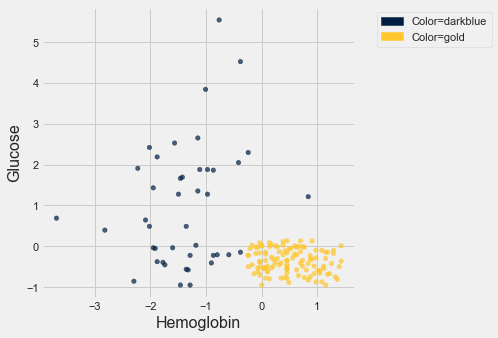

In [ ]:
ckd.scatter('Hemoglobin', 'Glucose', group='Color')

# Nearest Neighbor Classifier

To classify Alice as CKD or not, we find the patient in the training set who is “nearest” to Alice, and then use that patient’s diagnosis as our prediction for Alice.

In the graph below, the red dot represents Alice. It is joined with a black line to the point that is nearest to it – its nearest neighbor in the training set. The figure is drawn by a function called show_closest.

It takes an array that represents the and coordinates of Alice’s point. Vary those to see how the closest point changes! Note especially when the closest point is blue and when it is gold.

In [ ]:
def distance(point1, point2):
    """The distance between two arrays of numbers."""
    return np.sqrt(np.sum((point1 - point2)**2))

In [ ]:
def all_distances(training, point):
    """The distance between p (an array of numbers) and the numbers in row i of attribute_table."""
    attributes = training.drop('Class')
    def distance_from_point(row):
        return distance(point, np.array(row))
    return attributes.apply(distance_from_point)

In [ ]:
def table_with_distances(training, point):
    """A copy of the training table with the distance from each row to array p."""
    return training.with_column('Distance', all_distances(training, point))

In [ ]:
def closest(training, point, k):
    """A table containing the k closest rows in the training table to array p."""
    with_dists = table_with_distances(training, point)
    sorted_by_distance = with_dists.sort('Distance')
    topk = sorted_by_distance.take(np.arange(k))
    return topk

In [ ]:
def majority(topkclasses):
    """1 if the majority of the "Class" column is 1s, and 0 otherwise."""
    ones = topkclasses.where('Class', are.equal_to(1)).num_rows
    zeros = topkclasses.where('Class', are.equal_to(0)).num_rows
    if ones > zeros:
        return 1
    else:
        return 0

In [ ]:
def classify(training, p, k):
    """Classify an example with attributes p using k-nearest neighbor classification with the given training table."""
    closestk = closest(training, p, k)
    topkclasses = closestk.select('Class')
    return majority(topkclasses)

In [ ]:
def show_closest(point):
    """point = array([x,y]) 
    gives the coordinates of a new point
    shown in red"""
    
    HemoGl = ckd.drop('White Blood Cell Count', 'Color')
    t = closest(HemoGl, point, 1)
    x_closest = t.row(0).item(1)
    y_closest = t.row(0).item(2)
    ckd.scatter('Hemoglobin', 'Glucose', group='Color')
    plt.scatter(point.item(0), point.item(1), color='red', s=30)
    plt.plot(make_array(point.item(0), x_closest), make_array(point.item(1), y_closest), color='k', lw=2);

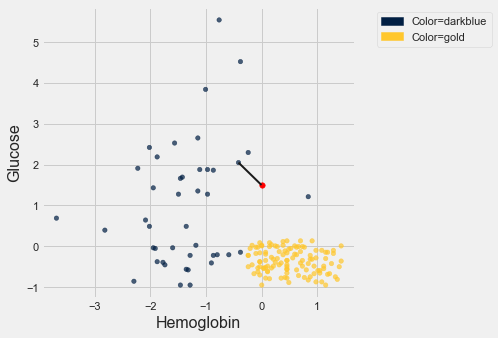

In [ ]:
# In this example, Alice's Hemoglobin attribute is 0 and her Glucose is 1.5.
alice = make_array(0, 1.5)
show_closest(alice)

Thus our nearest neighbor classifier works like this:

Find the point in the training set that is nearest to the new point. If that nearest point is a "CKD" point, classify the new point as "CKD". If the nearest point is a "not CKD" point, classify the new point as "not CKD".

# Decision boundary

For example, suppose the coordinates of Alice's point are (0, 1.5). Notice that the nearest neighbor is blue. Now try reducing the height (the 𝑦 -coordinate) of the point. You'll see that at around 𝑦=0.95 the nearest neighbor turns from blue to gold.

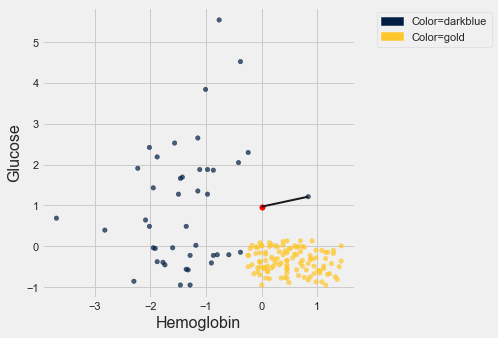

In [ ]:
alice = make_array(0, 0.97)
show_closest(alice)

In [ ]:
x_array = make_array()
y_array = make_array()
for x in np.arange(-2, 2.1, 0.1):
    for y in np.arange(-2, 2.1, 0.1):
        x_array = np.append(x_array, x)
        y_array = np.append(y_array, y)
        
test_grid = Table().with_columns(
    'Hemoglobin', x_array,
    'Glucose', y_array
)

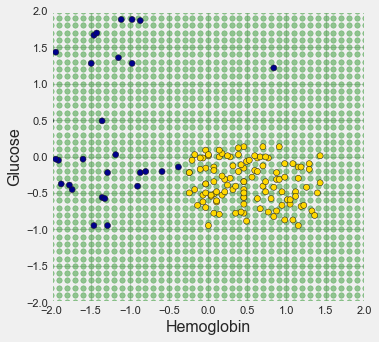

In [ ]:
test_grid.scatter('Hemoglobin', 'Glucose', color='green', alpha=0.4, s=30)
plt.scatter(ckd.column('Hemoglobin'), ckd.column('Glucose'), c=ckd.column('Color'), edgecolor='k')
plt.xlim(-2, 2)
plt.ylim(-2, 2);

Each of the red points has a nearest neighbor in the training set (the same blue and gold points as before). For some red points you can easily tell whether the nearest neighbor is blue or gold. For others, it's a little more tricky to make the decision by eye. Those are the points near the decision boundary.

In [ ]:
def classify_grid(training, test, k):
    c = make_array()
    for i in range(test.num_rows):
        # Run the classifier on the ith patient in the test set
        c = np.append(c, classify(training, make_array(test.row(i)), k))   
    return c

In [ ]:
c = classify_grid(ckd.drop('White Blood Cell Count', 'Color'), test_grid, 1)

The decision boundary is where the classifier switches from turning the red points blue to turning them gold.

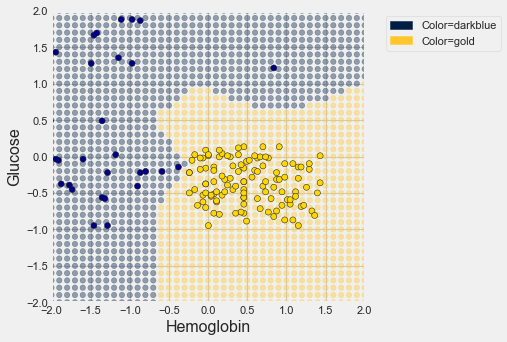

In [ ]:
test_grid = test_grid.with_column('Class', c).join('Class', color_table)
test_grid.scatter('Hemoglobin', 'Glucose', group='Color', alpha=0.4, s=30)
plt.scatter(ckd.column('Hemoglobin'), ckd.column('Glucose'), c=ckd.column('Color'), edgecolor='k')
plt.xlim(-2, 2)
plt.ylim(-2, 2);

# k-Nearest Neighbors

However, the separation between the two classes won't always be quite so clean. For instance, suppose that instead of hemoglobin levels we were to look at white blood cell count. Look at what happens:

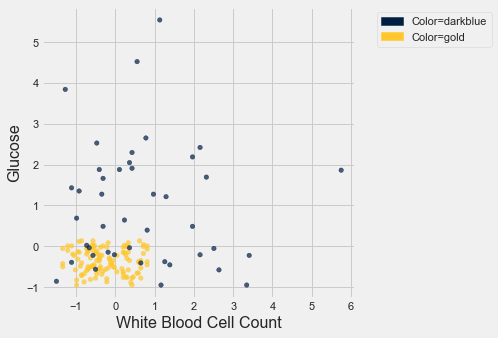

In [ ]:
ckd.scatter('White Blood Cell Count', 'Glucose', group='Color')

There is a simple generalization of the nearest neighbor classifier that fixes this anomaly. It is called the k-nearest neighbor classifier. To predict Alice's diagnosis, rather than looking at just the one neighbor closest to her, we can look at the 3 points that are closest to her, and use the diagnosis for each of those 3 points to predict Alice's diagnosis. In particular, we'll use the majority value among those 3 diagnoses as our prediction for Alice's diagnosis. Of course, there's nothing special about the number 3: we could use 4, or 5, or more. (It's often convenient to pick an odd number, so that we don't have to deal with ties.) In general, we pick a number 𝑘 , and our predicted diagnosis for Alice is based on the 𝑘 patients in the training set who are closest to Alice. Intuitively, these are the 𝑘 patients whose blood test results were most similar to Alice, so it seems reasonable to use their diagnoses to predict Alice's diagnosis.

The 𝑘 -nearest neighbor classifier will now behave just like our intuitive strategy above.

# Training and Testing

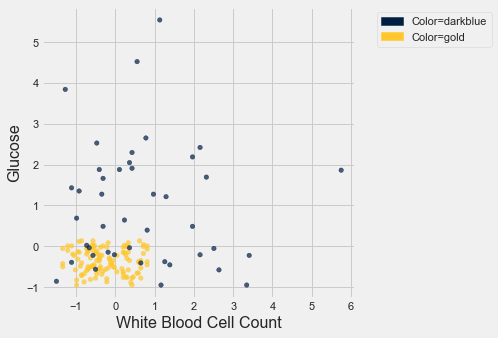

In [ ]:
ckd.scatter('White Blood Cell Count', 'Glucose', group='Color')

In [ ]:
shuffled_ckd = ckd.sample(with_replacement=False)
training = shuffled_ckd.take(np.arange(79))
testing = shuffled_ckd.take(np.arange(79, 158))

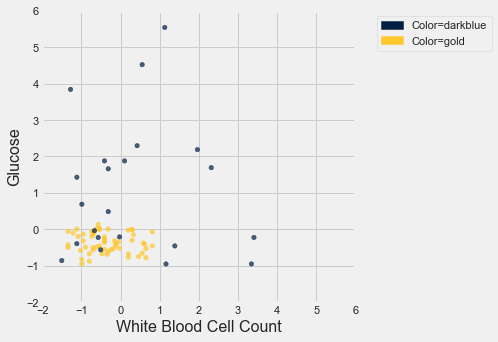

In [ ]:
training.scatter('White Blood Cell Count', 'Glucose', group='Color')
plt.xlim(-2, 6)
plt.ylim(-2, 6);

In [ ]:
ckd.row(0)

Row(Class=0, Hemoglobin=0.45688370171598491, Glucose=0.13375085451774507, White Blood Cell Count=0.61728251314009996, Color='gold')

In [ ]:
ckd.row(0).item(3)

0.61728251314009996

In [ ]:
ckd = Table().with_columns(
    'Hemoglobin', standard_units(ckd.column('Hemoglobin')),
    'Glucose', standard_units(ckd.column('Glucose')),
    'Class', ckd.column('Class')
)

In [ ]:
color_table = Table().with_columns(
    'Class', make_array(1, 0),
    'Color', make_array('darkblue', 'gold')
)
ckd = ckd.join('Class', color_table)
ckd

Class,Hemoglobin,Glucose,Color
0,0.456884,0.133751,gold
0,1.153,-0.947597,gold
0,0.770138,-0.762223,gold
0,0.596108,-0.190654,gold
0,-0.239236,-0.49961,gold
0,-0.0304002,-0.159758,gold
0,0.282854,-0.00527964,gold
0,0.108824,-0.623193,gold
0,0.0740178,-0.515058,gold
0,0.83975,-0.422371,gold


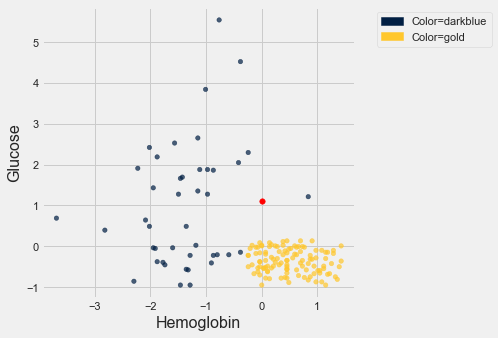

In [ ]:
alice = make_array(0, 1.1)
ckd.scatter('Hemoglobin', 'Glucose', group='Color')
plt.scatter(alice.item(0), alice.item(1), color='red', s=30);

In [ ]:
ckd_attributes = ckd.select('Hemoglobin', 'Glucose')

In [ ]:
ckd_attributes

Hemoglobin,Glucose
0.456884,0.133751
1.153,-0.947597
0.770138,-0.762223
0.596108,-0.190654
-0.239236,-0.49961
-0.0304002,-0.159758
0.282854,-0.00527964
0.108824,-0.623193
0.0740178,-0.515058
0.83975,-0.422371


In [ ]:
ckd_attributes.row(3)

Row(Hemoglobin=0.59610766482326649, Glucose=-0.19065363034327706)

In [ ]:
np.array(ckd_attributes.row(3))

array([ 0.59610766, -0.19065363])

# Distance Between Points When There are Two Attributes

In [ ]:
patient3 = np.array(ckd_attributes.row(3))
alice, patient3

(array([ 0. ,  1.1]), array([ 0.59610766, -0.19065363]))

In [ ]:
distance = np.sqrt(np.sum((alice - patient3)**2))
distance

1.4216649188818471

In [ ]:
def distance(point1, point2):
    """Returns the Euclidean distance between point1 and point2.
    
    Each argument is an array containing the coordinates of a point."""
    return np.sqrt(np.sum((point1 - point2)**2))

In [ ]:
distance(alice, patient3)

1.4216649188818471

# Using apply on an Entire Row

In [ ]:
t = ckd_attributes.take(np.arange(5))
t

Hemoglobin,Glucose
0.456884,0.133751
1.153,-0.947597
0.770138,-0.762223
0.596108,-0.190654
-0.239236,-0.49961


In [ ]:
def max_abs(row):
    return np.max(np.abs(np.array(row)))

In [ ]:
max_abs(t.row(4))

0.49961028259186963

In [ ]:
t.apply(max_abs)

array([ 0.4568837 ,  1.15300352,  0.77013762,  0.59610766,  0.49961028])

# Alice’s K Nearest Neighbors

In [ ]:
alice

array([ 0. ,  1.1])

In [ ]:
def distance_from_alice(row):
    """Returns distance between Alice and a row of the attributes table"""
    return distance(alice, np.array(row))

In [ ]:
distance_from_alice(ckd_attributes.row(3))

1.4216649188818471

In [ ]:
distances = ckd_attributes.apply(distance_from_alice)
ckd_with_distances = ckd.with_column('Distance from Alice', distances)

In [ ]:
ckd_with_distances

Class,Hemoglobin,Glucose,Color,Distance from Alice
0,0.456884,0.133751,gold,1.06882
0,1.153,-0.947597,gold,2.34991
0,0.770138,-0.762223,gold,2.01519
0,0.596108,-0.190654,gold,1.42166
0,-0.239236,-0.49961,gold,1.6174
0,-0.0304002,-0.159758,gold,1.26012
0,0.282854,-0.00527964,gold,1.1409
0,0.108824,-0.623193,gold,1.72663
0,0.0740178,-0.515058,gold,1.61675
0,0.83975,-0.422371,gold,1.73862


In [ ]:
sorted_by_distance = ckd_with_distances.sort('Distance from Alice')
sorted_by_distance

Class,Hemoglobin,Glucose,Color,Distance from Alice
1,0.83975,1.2151,darkblue,0.847601
1,-0.970162,1.27689,darkblue,0.986156
0,-0.0304002,0.0874074,gold,1.01305
0,0.14363,0.0874074,gold,1.02273
1,-0.413266,2.04928,darkblue,1.03534
0,0.387272,0.118303,gold,1.05532
0,0.456884,0.133751,gold,1.06882
0,0.178436,0.0410639,gold,1.07386
0,0.00440582,0.025616,gold,1.07439
0,-0.169624,0.025616,gold,1.08769


In [ ]:
alice_5_nearest_neighbors = sorted_by_distance.take(np.arange(5))
alice_5_nearest_neighbors

Class,Hemoglobin,Glucose,Color,Distance from Alice
1,0.83975,1.2151,darkblue,0.847601
1,-0.970162,1.27689,darkblue,0.986156
0,-0.0304002,0.0874074,gold,1.01305
0,0.14363,0.0874074,gold,1.02273
1,-0.413266,2.04928,darkblue,1.03534


# Q) 5

Wine Classifier

In [ ]:
wine = Table.read_table("https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv")

In [ ]:
# For converting Class to binary

def is_one(x):
    if x == 1:
        return 1
    else:
        return 0
    
wine = wine.with_column('Class', wine.apply(is_one, 0))

In [ ]:
wine

Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline,Class
1,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.2,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.4,1050,1
1,13.16,2.36,2.67,18.6,101,2.8,3.24,0.3,2.81,5.68,1.03,3.17,1185,1
1,14.37,1.95,2.5,16.8,113,3.85,3.49,0.24,2.18,7.8,0.86,3.45,1480,1
1,13.24,2.59,2.87,21,118,2.8,2.69,0.39,1.82,4.32,1.04,2.93,735,1
1,14.2,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1
1,14.39,1.87,2.45,14.6,96,2.5,2.52,0.3,1.98,5.25,1.02,3.58,1290,1
1,14.06,2.15,2.61,17.6,121,2.6,2.51,0.31,1.25,5.05,1.06,3.58,1295,1
1,14.83,1.64,2.17,14,97,2.8,2.98,0.29,1.98,5.2,1.08,2.85,1045,1
1,13.86,1.35,2.27,16,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,1


In [ ]:
wine_attributes = wine.drop('Class')

In [ ]:
distance(np.array(wine_attributes.row(0)), np.array(wine_attributes.row(1)))

31.265012394048398

The first two wines are both in Class 1. To find the distance between them, we first need a table of just the attributes: The last wine in the table is of Class 0. Its distance from the first wine is:

In [ ]:
distance(np.array(wine_attributes.row(0)), np.array(wine_attributes.row(177)))

506.06331975356602

Let’s do some visualization to see if Class 1 really looks different from Class 0.

In [ ]:
wine_with_colors = wine.join('Class', color_table)

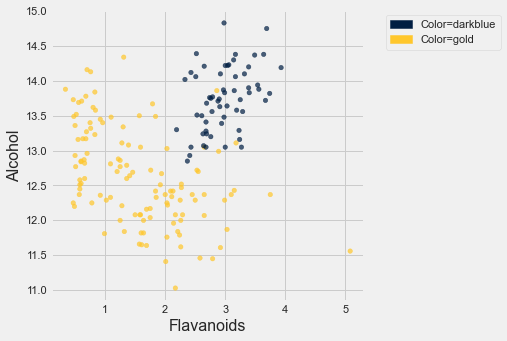

In [ ]:
wine_with_colors.scatter('Flavanoids', 'Alcohol', group='Color')

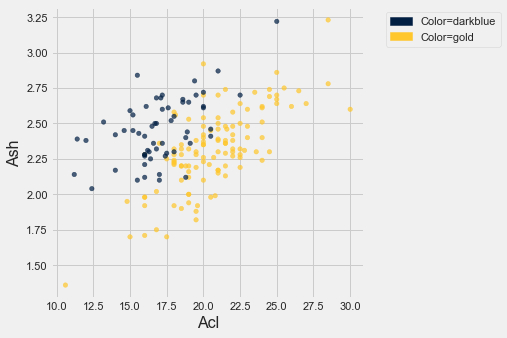

In [ ]:
wine_with_colors.scatter('Acl', 'Ash', group='Color')

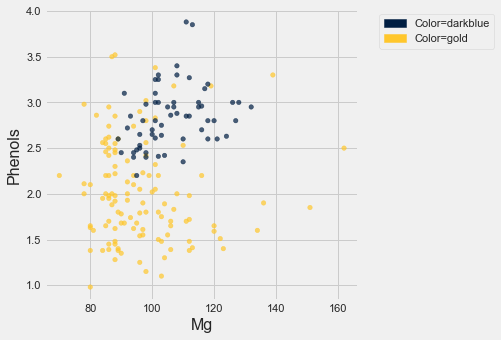

In [ ]:
wine_with_colors.scatter('Mg', 'Phenols', group='Color')

# KNN

In [ ]:
def closest(training, p, k):
    ...

In [ ]:
def majority(topkclasses):
    ...

In [ ]:
def classify(training, p, k):
    kclosest = closest(training, p, k)
    kclosest.classes = kclosest.select('Class')
    return majority(kclosest)

In [ ]:
def distance(point1, point2):
    """Returns the distance between point1 and point2
    where each argument is an array 
    consisting of the coordinates of the point"""
    return np.sqrt(np.sum((point1 - point2)**2))

In [ ]:
def all_distances(training, new_point):
    """Returns an array of distances
    between each point in the training set
    and the new point (which is a row of attributes)"""
    attributes = training.drop('Class')
    def distance_from_point(row):
        return distance(np.array(new_point), np.array(row))
    return attributes.apply(distance_from_point)

In [ ]:
def table_with_distances(training, new_point):
    """Augments the training table 
    with a column of distances from new_point"""
    return training.with_column('Distance', all_distances(training, new_point))

In [ ]:
def closest(training, new_point, k):
    """Returns a table of the k rows of the augmented table
    corresponding to the k smallest distances"""
    with_dists = table_with_distances(training, new_point)
    sorted_by_distance = with_dists.sort('Distance')
    topk = sorted_by_distance.take(np.arange(k))
    return topk

We’ll just take the first wine and find its five nearest neighbors among all the wines. Remember that since this wine is part of the dataset, it is its own nearest neighbor. So we should expect to see it at the top of the list, followed by four others.

In [ ]:
special_wine = wine.drop('Class').row(0)

In [ ]:
closest(wine, special_wine, 5)

Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline,Class,Distance
1,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,0
1,13.74,1.67,2.25,16.4,118,2.6,2.9,0.21,1.62,5.85,0.92,3.2,1060,1,10.3928
1,14.21,4.04,2.44,18.9,111,2.85,2.65,0.3,1.25,5.24,0.87,3.33,1080,1,22.3407
1,14.1,2.02,2.4,18.8,103,2.75,2.92,0.32,2.38,6.2,1.07,2.75,1060,1,24.7602
1,14.38,3.59,2.28,16,102,3.25,3.17,0.27,2.19,4.9,1.04,3.44,1065,1,25.0947


In [ ]:
special_wine = wine.drop('Class').row(177)
classify(wine, special_wine, 5)

In [ ]:
shuffled_wine = wine.sample(with_replacement=False) 
training_set = shuffled_wine.take(np.arange(89))
test_set  = shuffled_wine.take(np.arange(89, 178))

In [ ]:
def count_zero(array):
    """Counts the number of 0's in an array"""
    return len(array) - np.count_nonzero(array)

In [ ]:
def count_equal(array1, array2):
    """Takes two numerical arrays of equal length
    and counts the indices where the two are equal"""
    return count_zero(array1 - array2)

In [ ]:
def evaluate_accuracy(training, test, k):
    test_attributes = test.drop('Class')
    def classify_testrow(row):
        return classify(training, row, k)
    c = test_attributes.apply(classify_testrow)
    return count_equal(c, test.column('Class')) / test.num_rows

# Regression

## Question-7

# Housing Price Prediction

## Multiple Linear Regression

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
housing = pd.DataFrame(pd.read_csv("/content/House.csv"))

In [ ]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Data Inspection

In [ ]:
housing.shape

(545, 13)

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


# Data Cleaning

In [ ]:
housing.isnull().sum()*100/housing.shape[0]

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

There are no NULL values in the dataset, hence it is clean

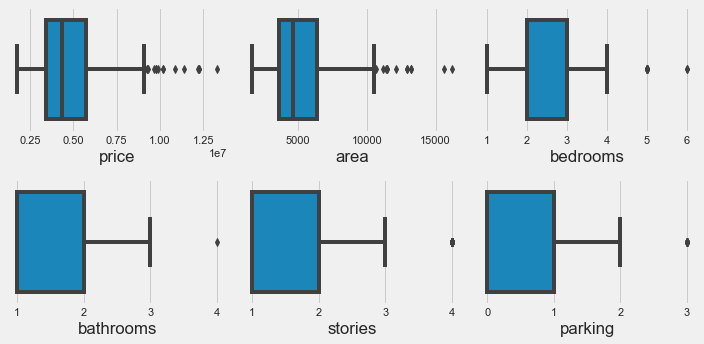

In [ ]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(housing['price'], ax = axs[0,0])
plt2 = sns.boxplot(housing['area'], ax = axs[0,1])
plt3 = sns.boxplot(housing['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(housing['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(housing['stories'], ax = axs[1,1])
plt3 = sns.boxplot(housing['parking'], ax = axs[1,2])
plt.tight_layout()

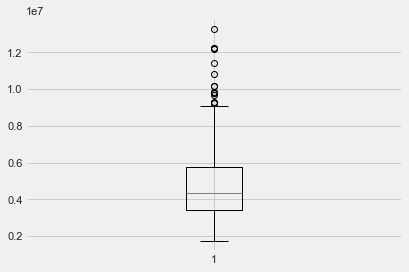

In [ ]:
plt.boxplot(housing.price)
Q1 = housing.price.quantile(0.25)
Q3 = housing.price.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.price >= Q1 - 1.5*IQR) & (housing.price <= Q3 + 1.5*IQR)]

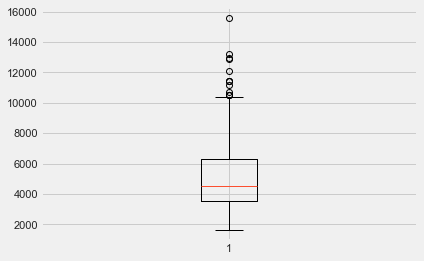

In [ ]:
plt.boxplot(housing.area)
Q1 = housing.area.quantile(0.25)
Q3 = housing.area.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.area >= Q1 - 1.5*IQR) & (housing.area <= Q3 + 1.5*IQR)]

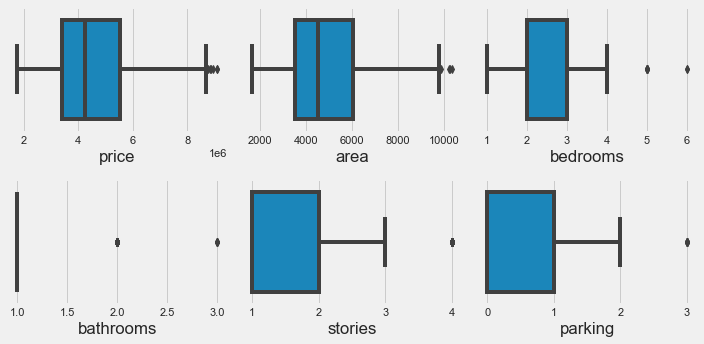

In [ ]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(housing['price'], ax = axs[0,0])
plt2 = sns.boxplot(housing['area'], ax = axs[0,1])
plt3 = sns.boxplot(housing['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(housing['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(housing['stories'], ax = axs[1,1])
plt3 = sns.boxplot(housing['parking'], ax = axs[1,2])
plt.tight_layout()

# Exploratory Data Analytics

## Visualising Numeric Variables

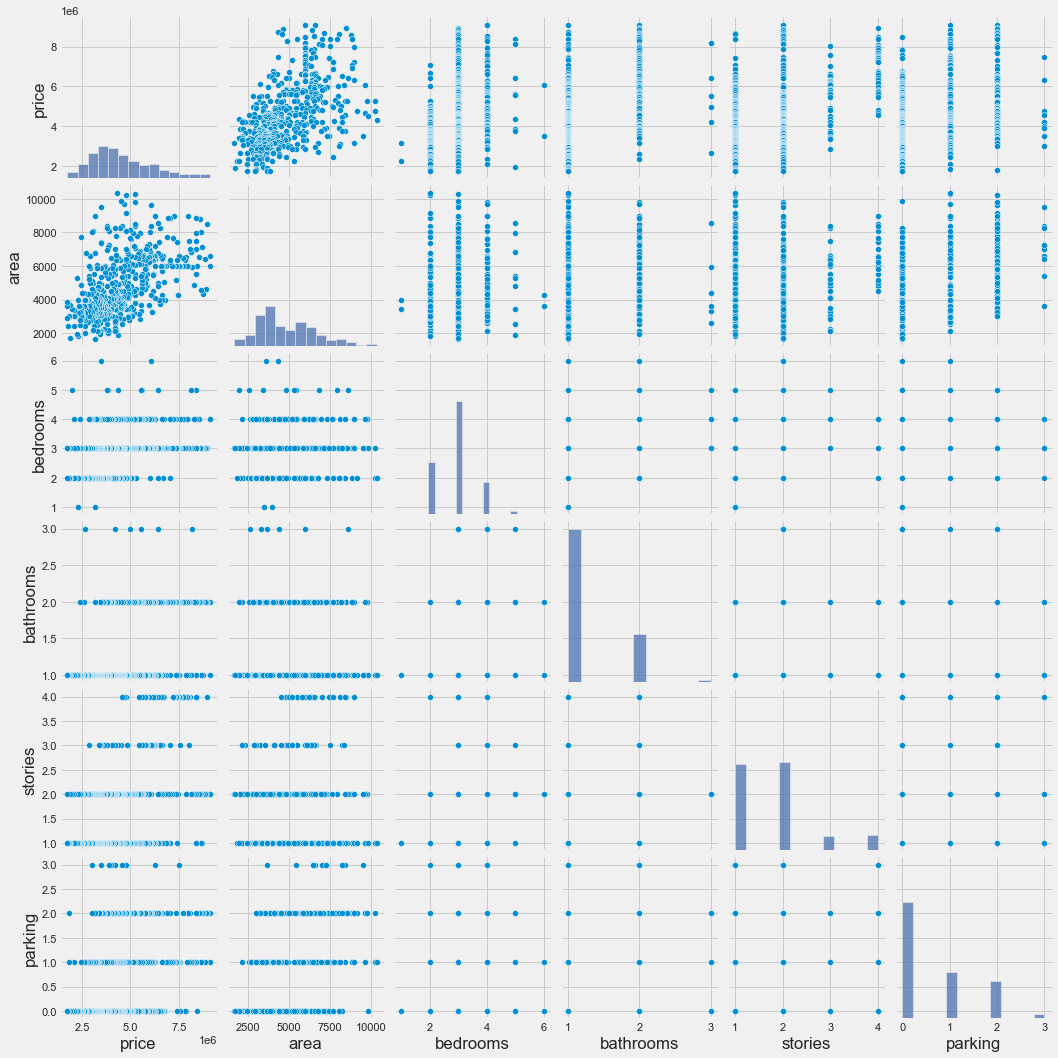

In [ ]:
sns.pairplot(housing)
plt.show()

# Visualising Categorical Variables

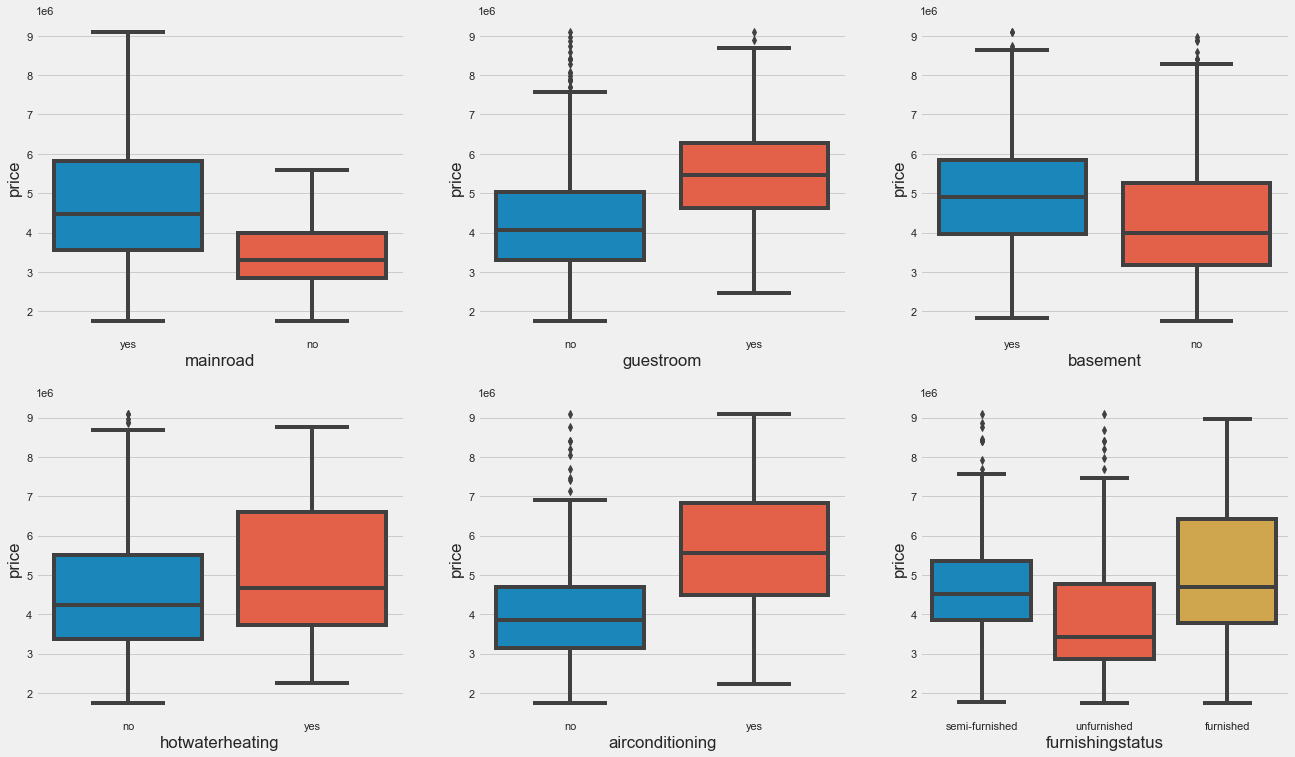

In [ ]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = housing)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = housing)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = housing)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = housing)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = housing)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = housing)
plt.show()

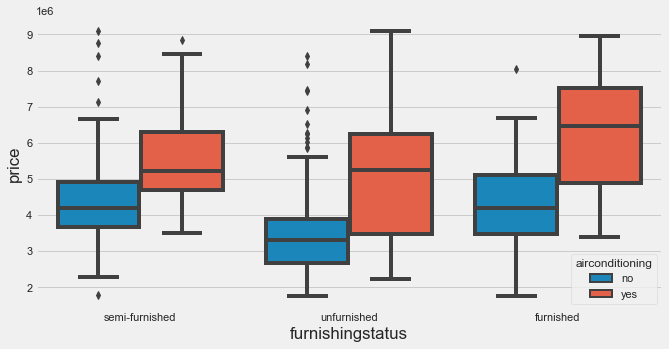

In [ ]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = housing)
plt.show()

# Data Preparation

In [ ]:
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
def binary_map(x):
    return x.map({'yes': 1, "no": 0})
housing[varlist] = housing[varlist].apply(binary_map)

In [ ]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished


# Dummy Variables

In [ ]:
status = pd.get_dummies(housing['furnishingstatus'])

In [ ]:
status.head()

,furnished,semi-furnished,unfurnished
15,0,1,0
16,0,0,1
17,1,0,0
18,1,0,0
19,0,1,0


In [ ]:
status = pd.get_dummies(housing['furnishingstatus'], drop_first = True)

In [ ]:
housing = pd.concat([housing, status], axis = 1)

In [ ]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished,1,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished,0,1
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished,1,0


In [ ]:
housing.drop(['furnishingstatus'], axis = 1, inplace = True)

In [ ]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,1,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,0,1
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1,0


# Splitting the Data into Training and Testing Sets

In [ ]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)

# Rescaling the Features

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [ ]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
148,0.523810,0.526907,0.4,0.0,0.666667,1,0,0,0,0,0.000000,1,1,0
236,0.390476,0.114134,0.2,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
356,0.275238,0.072738,0.8,0.5,0.000000,0,0,1,0,1,0.333333,0,0,0
425,0.219048,0.151390,0.2,0.0,0.000000,1,0,1,0,0,0.666667,0,0,0
516,0.095238,0.157895,0.2,0.0,0.000000,0,1,0,0,0,0.333333,0,0,1


In [ ]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000
mean,0.383701,0.350081,0.390582,0.127424,0.268698,0.875346,0.168975,0.349030,0.038781,0.313019,0.218837,0.207756,0.476454,0.304709
std,0.209712,0.207184,0.149146,0.224465,0.287833,0.330784,0.375250,0.477325,0.193341,0.464366,0.287286,0.406264,0.500138,0.460923
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.237143,0.189829,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.338095,0.295092,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.514286,0.491425,0.400000,0.000000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


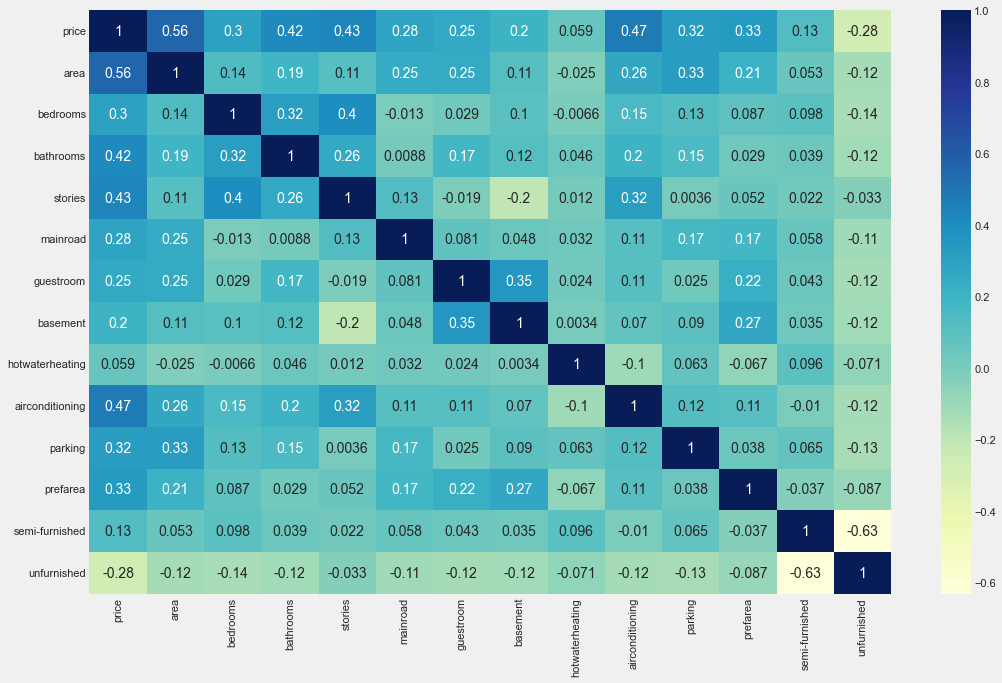

In [ ]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

# Dividing into X and Y sets for the model building

In [ ]:
y_train = df_train.pop('price')
X_train = df_train

# Model Building

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
rfe = RFE(lm, n_features_to_select= 6)      
rfe = rfe.fit(X_train, y_train)

In [ ]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('area', True, 1),
 ('bedrooms', False, 7),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', False, 5),
 ('guestroom', False, 6),
 ('basement', False, 4),
 ('hotwaterheating', False, 2),
 ('airconditioning', True, 1),
 ('parking', True, 1),
 ('prefarea', True, 1),
 ('semi-furnished', False, 8),
 ('unfurnished', False, 3)]

In [ ]:
col = X_train.columns[rfe.support_]
col

Index(['area', 'bathrooms', 'stories', 'airconditioning', 'parking',
       'prefarea'],
      dtype='object')

In [ ]:
X_train.columns[~rfe.support_]

Index(['bedrooms', 'mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'semi-furnished', 'unfurnished'],
      dtype='object')

# Building model using statsmodel, for the detailed statistics

In [ ]:
X_train_rfe = X_train[col]

In [ ]:
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [ ]:
lm = sm.OLS(y_train,X_train_rfe).fit() 

In [ ]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     92.83
Date:                Sun, 01 Jan 2023   Prob (F-statistic):           1.31e-69
Time:                        14:22:18   Log-Likelihood:                 222.77
No. Observations:                 361   AIC:                            -431.5
Df Residuals:                     354   BIC:                            -404.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1097      0.015     

In [ ]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     92.83
Date:                Sun, 01 Jan 2023   Prob (F-statistic):           1.31e-69
Time:                        14:22:18   Log-Likelihood:                 222.77
No. Observations:                 361   AIC:                            -431.5
Df Residuals:                     354   BIC:                            -404.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1097      0.015     

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,4.51
1,area,1.24
4,airconditioning,1.20
3,stories,1.17
5,parking,1.14
2,bathrooms,1.12
6,prefarea,1.05


# Residual Analysis of the train data

In [ ]:
y_train_price = lm.predict(X_train_rfe)

In [ ]:
res = (y_train_price - y_train)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

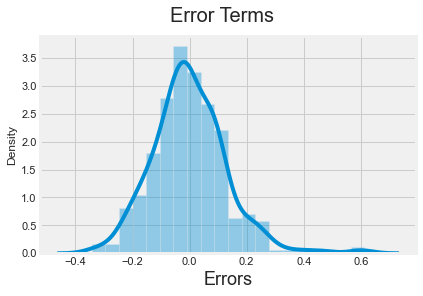

In [ ]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)              
plt.xlabel('Errors', fontsize = 18)  

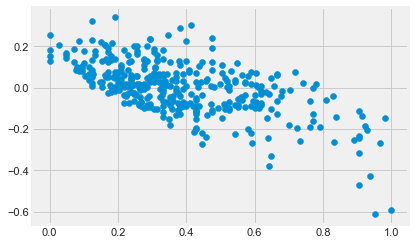

In [ ]:
plt.scatter(y_train,res)
plt.show()

# Model Evaluation

In [ ]:
num_vars = ['area','stories', 'bathrooms', 'airconditioning', 'prefarea','parking','price']

In [ ]:
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

# Dividing into X_test and y_test

In [ ]:
y_test = df_test.pop('price')
X_test = df_test

In [ ]:
X_test = sm.add_constant(X_test)

In [ ]:
X_test_rfe = X_test[X_train_rfe.columns]

In [ ]:
y_pred = lm.predict(X_test_rfe)

In [ ]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.57912477743977386

Text(0, 0.5, 'y_pred')

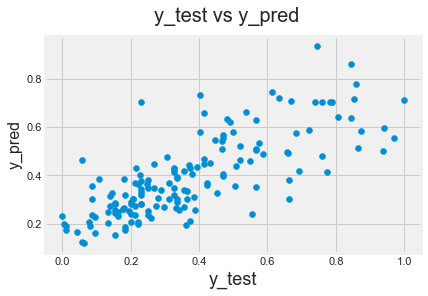

In [ ]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                         
plt.ylabel('y_pred', fontsize=16)

# Q) 8

# Train and Test from Titanic

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [ ]:
def draw_missing_data_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Validation score")

    plt.legend(loc="best")
    return plt

In [ ]:
def plot_validation_curve(estimator, title, X, y, param_name, param_range, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    train_scores, test_scores = validation_curve(estimator, X, y, param_name, param_range, cv)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(param_range, train_mean, color='r', marker='o', markersize=5, label='Training score')
    plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='r')
    plt.plot(param_range, test_mean, color='g', linestyle='--', marker='s', markersize=5, label='Validation score')
    plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='g')
    plt.grid() 
    plt.xscale('log')
    plt.legend(loc='best') 
    plt.xlabel('Parameter') 
    plt.ylabel('Score') 
    plt.ylim(ylim)

# Importing Data

In [4]:
df = pd.read_csv("/content/train.csv")
df_raw = df.copy()

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
draw_missing_data_table(df)

,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


In [ ]:
df.drop('Cabin', axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# Fill missing values in Age with a specific value

In [ ]:
value = 1000
df['Age'].fillna(1000, inplace=True)
df['Age'].max()

1000.0

In [ ]:
df.drop(df[pd.isnull(df['Embarked'])].index, inplace=True)  # Get index of points where Embarked is null
df[pd.isnull(df['Embarked'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


# Preparing the data

In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [ ]:
df.drop('PassengerId', axis=1, inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
df['Sex'] = pd.Categorical(df['Sex'])
df['Embarked'] = pd.Categorical(df['Embarked'])

In [ ]:
df['FamilySize'] = df['SibSp'] + df['Parch']
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [ ]:
df.drop('SibSp',axis=1,inplace=True)
df.drop('Parch',axis=1,inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,FamilySize
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0


In [ ]:
df.drop('Name', axis=1, inplace=True)
df.drop('Ticket', axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


# Now, we will launch the mode

In [ ]:
df = pd.get_dummies(df, drop_first=True)  # To avoid dummy trap
df.head()

,Survived,Pclass,Age,Fare,FamilySize,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,1,1,0,1
1,1,1,38.0,71.2833,1,0,0,0
2,1,3,26.0,7.9250,0,0,0,1
3,1,1,35.0,53.1000,1,0,0,1
4,0,3,35.0,8.0500,0,1,0,1


# Create data set to train data imputation methods

In [ ]:
X = df[df.loc[:, df.columns != 'Survived'].columns]
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

In [ ]:
print('Inputs: \n', X_train.head())
print('Outputs: \n', y_train.head())

Inputs: 
      Pclass     Age      Fare  FamilySize  Sex_male  Embarked_Q  Embarked_S
121       3  1000.0    8.0500           0         1           0           1
687       3    19.0   10.1708           0         1           0           1
790       3  1000.0    7.7500           0         1           1           0
837       3  1000.0    8.0500           0         1           0           1
659       1    58.0  113.2750           2         1           0           0
Outputs: 
 121    0
687    0
790    0
837    0
659    0
Name: Survived, dtype: int64


# Fit logistic regression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

# Model performance

In [ ]:
scores = cross_val_score(logreg, X_train, y_train, cv=10)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.783 +/- 0.035


# Assessing model performance

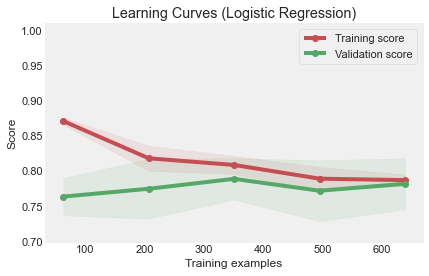

In [ ]:
title = "Learning Curves (Logistic Regression)"
cv = 10
plot_learning_curve(logreg, title, X_train, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=1);

# Restart data set

In [ ]:
df = df_raw.copy()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df['FamilySize'] = df['SibSp'] + df['Parch']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


# Drop SibSp and Parch

In [ ]:
df.drop('SibSp',axis=1,inplace=True)
df.drop('Parch',axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


In [ ]:
df.drop(['Name','Ticket','Cabin'], axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,1,0,3,male,22.0,7.2500,S,1
1,2,1,1,female,38.0,71.2833,C,1
2,3,1,3,female,26.0,7.9250,S,0
3,4,1,1,female,35.0,53.1000,S,1
4,5,0,3,male,35.0,8.0500,S,0


In [ ]:
df_raw['Name'].unique()[:10]

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)'], dtype=object)

In [ ]:
df['Title']=0
for i in df:
    df['Title']=df_raw['Name'].str.extract('([A-Za-z]+)\.', expand=False)  # Use REGEX to define a search pattern
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title
0,1,0,3,male,22.0,7.2500,S,1,Mr
1,2,1,1,female,38.0,71.2833,C,1,Mrs
2,3,1,3,female,26.0,7.9250,S,0,Miss
3,4,1,1,female,35.0,53.1000,S,1,Mrs
4,5,0,3,male,35.0,8.0500,S,0,Mr


In [ ]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

# Plot bar plot (titles, age and sex)

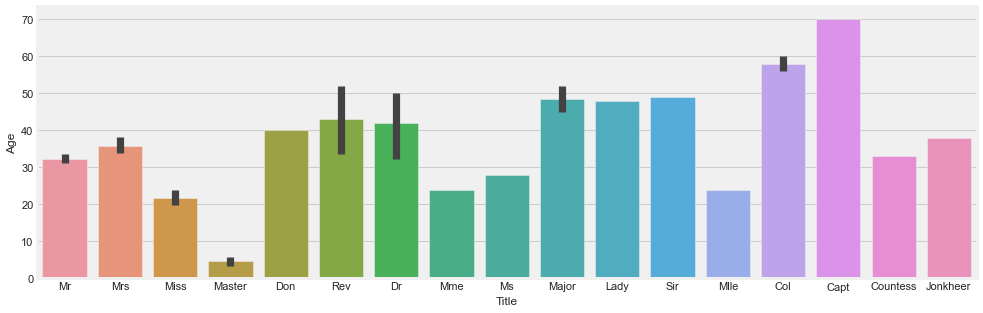

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x=df['Title'], y=df_raw['Age']);

# Means per title

In [ ]:
df_raw['Title'] = df['Title']  # To simplify data handling
means = df_raw.groupby('Title')['Age'].mean()
means.head()

Title
Capt        70.0
Col         58.0
Countess    33.0
Don         40.0
Dr          42.0
Name: Age, dtype: float64

In [ ]:
map_means = means.to_dict()
map_means

{'Capt': 70.0,
 'Col': 58.0,
 'Countess': 33.0,
 'Don': 40.0,
 'Dr': 42.0,
 'Jonkheer': 38.0,
 'Lady': 48.0,
 'Major': 48.5,
 'Master': 4.574166666666667,
 'Miss': 21.773972602739725,
 'Mlle': 24.0,
 'Mme': 24.0,
 'Mr': 32.368090452261306,
 'Mrs': 35.898148148148145,
 'Ms': 28.0,
 'Rev': 43.166666666666664,
 'Sir': 49.0}

# Impute ages based on titles

In [ ]:
idx_nan_age = df.loc[np.isnan(df['Age'])].index
df.loc[idx_nan_age,'Age'].loc[idx_nan_age] = df['Title'].loc[idx_nan_age].map(map_means)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title
0,1,0,3,male,22.0,7.2500,S,1,Mr
1,2,1,1,female,38.0,71.2833,C,1,Mrs
2,3,1,3,female,26.0,7.9250,S,0,Miss
3,4,1,1,female,35.0,53.1000,S,1,Mrs
4,5,0,3,male,35.0,8.0500,S,0,Mr


# Exploratory Data Analysis

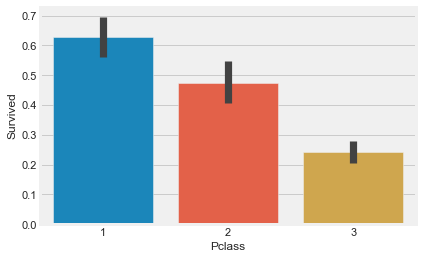

In [ ]:
sns.barplot(df['Pclass'],df['Survived']);

In [ ]:
df.groupby(['Title'])['PassengerId'].count()

Title
Capt          1
Col           2
Countess      1
Don           1
Dr            7
Jonkheer      1
Lady          1
Major         2
Master       40
Miss        182
Mlle          2
Mme           1
Mr          517
Mrs         125
Ms            1
Rev           6
Sir           1
Name: PassengerId, dtype: int64

In [ ]:
titles_dict = {'Capt': 'Other',
               'Major': 'Other',
               'Jonkheer': 'Other',
               'Don': 'Other',
               'Sir': 'Other',
               'Dr': 'Other',
               'Rev': 'Other',
               'Countess': 'Other',
               'Dona': 'Other',
               'Mme': 'Mrs',
               'Mlle': 'Miss',
               'Ms': 'Miss',
               'Mr': 'Mr',
               'Mrs': 'Mrs',
               'Miss': 'Miss',
               'Master': 'Master',
               'Lady': 'Other'}

In [ ]:
df['Title'] = df['Title'].map(titles_dict)
df['Title'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

In [ ]:
df['Title'] = pd.Categorical(df['Title'])
df.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Sex              object
Age             float64
Fare            float64
Embarked         object
FamilySize        int64
Title          category
dtype: object

# Plot

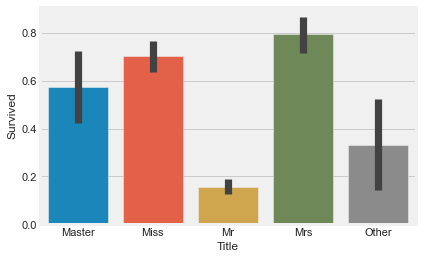

In [ ]:
sns.barplot(x='Title', y='Survived', data=df);

In [ ]:
df['Sex'] = pd.Categorical(df['Sex'])

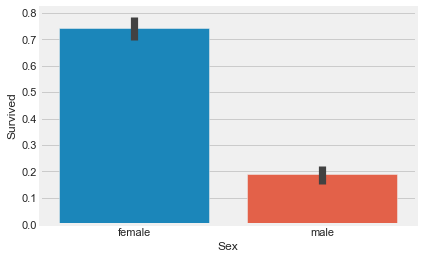

In [ ]:
sns.barplot(df['Sex'],df['Survived']);

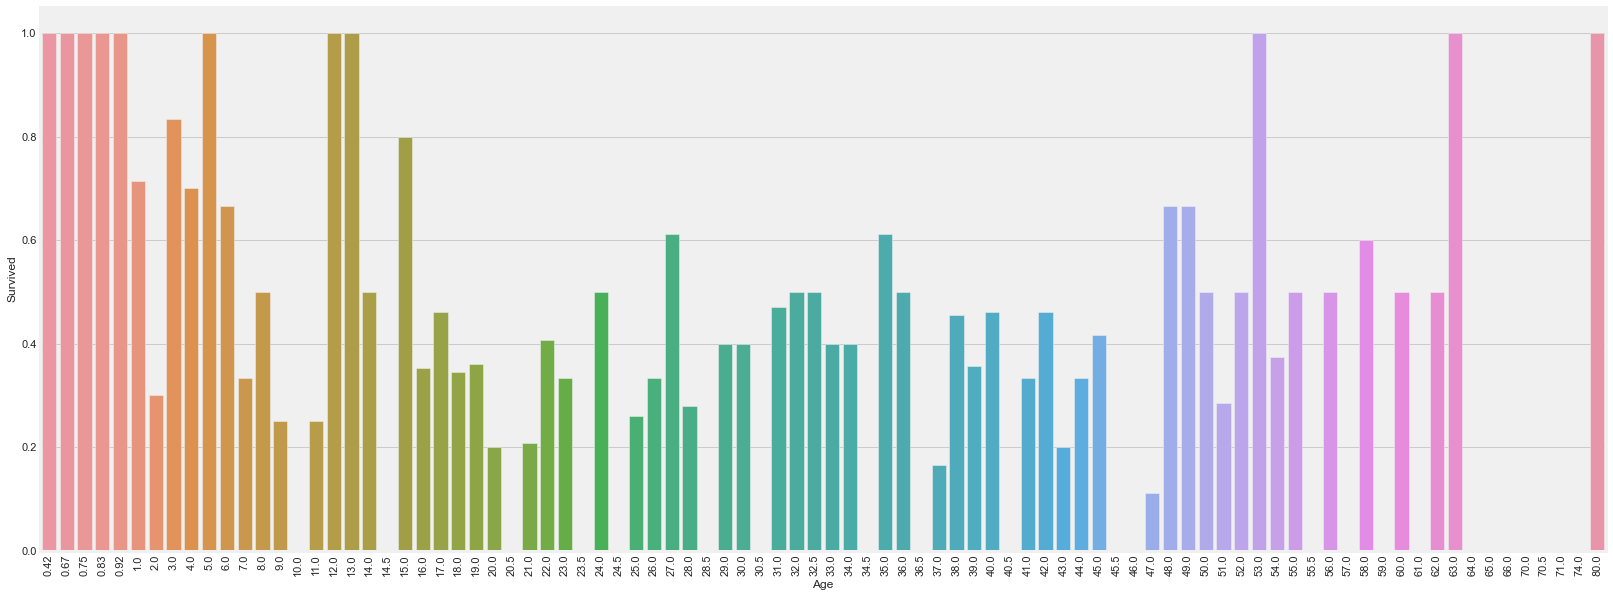

In [ ]:
plt.figure(figsize=(25,10))
sns.barplot(df['Age'],df['Survived'], ci=None)
plt.xticks(rotation=90);

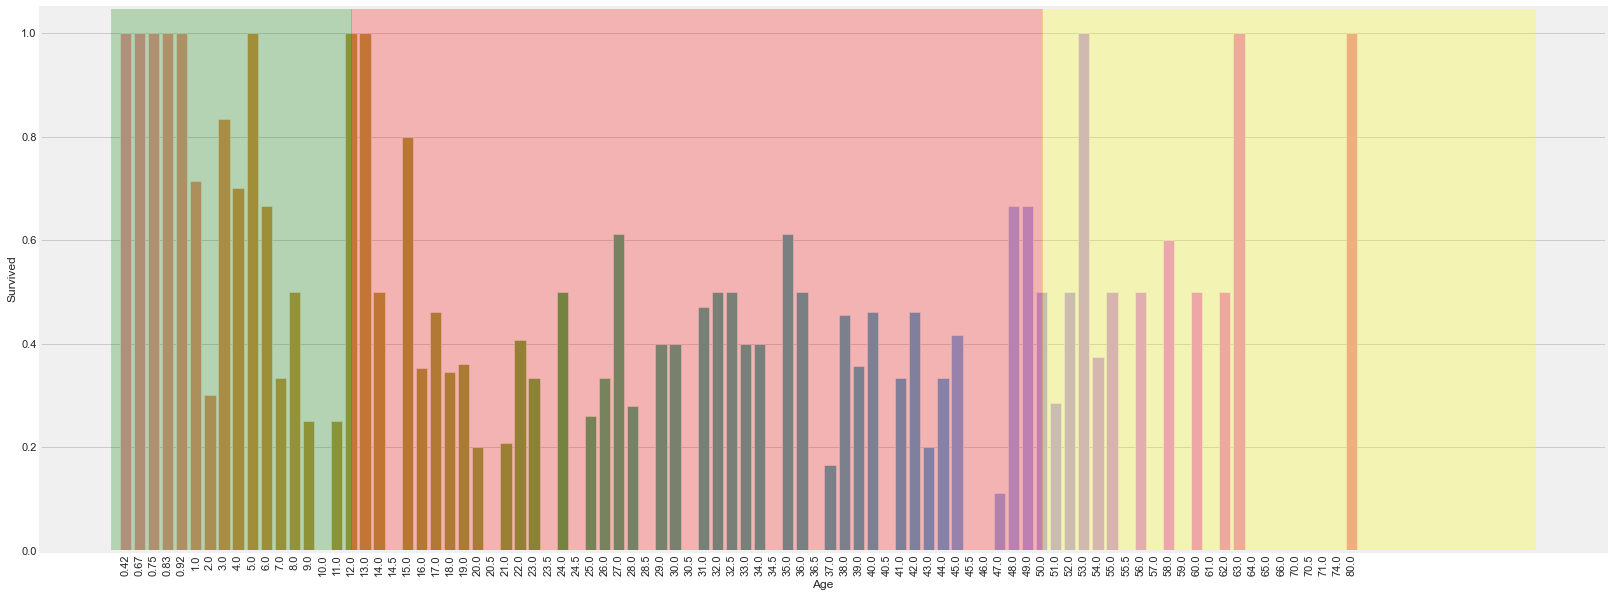

In [ ]:
limit_1 = 12
limit_2 = 50

x_limit_1 = np.size(df[df['Age'] < limit_1]['Age'].unique())
x_limit_2 = np.size(df[df['Age'] < limit_2]['Age'].unique())

plt.figure(figsize=(25,10))
sns.barplot(df['Age'],df['Survived'], ci=None)

plt.axvspan(-1, x_limit_1, alpha=0.25, color='green')
plt.axvspan(x_limit_1, x_limit_2, alpha=0.25, color='red')
plt.axvspan(x_limit_2, 100, alpha=0.25, color='yellow')

plt.xticks(rotation=90);

# Bin data

In [ ]:
df['Age'] = pd.cut(df['Age'], bins=[0, 12, 50, 200], labels=['Child','Adult','Elder'])
df['Age'].head()

0    Adult
1    Adult
2    Adult
3    Adult
4    Adult
Name: Age, dtype: category
Categories (3, object): ['Child' < 'Adult' < 'Elder']

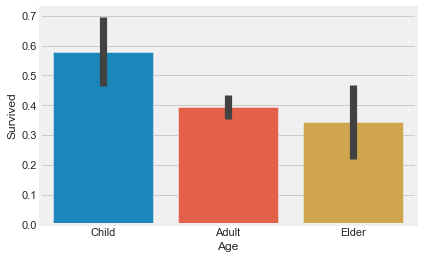

In [ ]:
sns.barplot(df['Age'], df['Survived']);

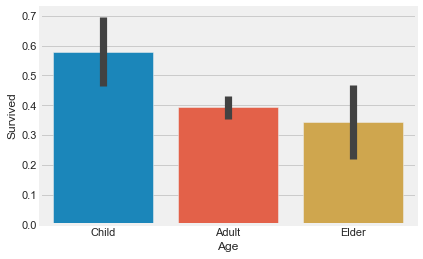

In [ ]:
sns.barplot(df['Age'], df['Survived']);

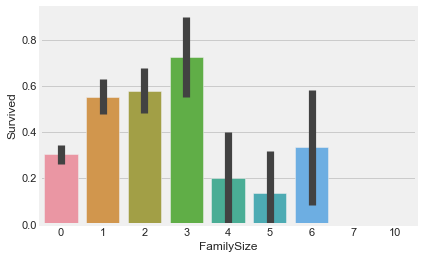

In [ ]:
sns.barplot(df['FamilySize'], df['Survived']);

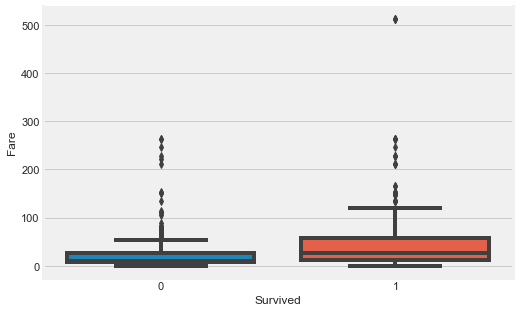

In [ ]:
plt.figure(figsize=(7.5,5))
sns.boxplot(df['Survived'], df['Fare']);

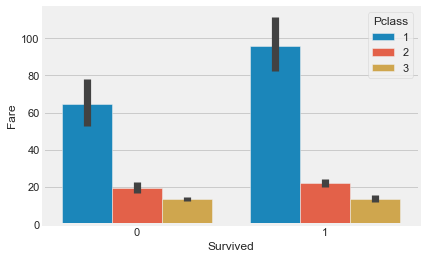

In [ ]:
sns.barplot(df['Survived'], df['Fare'], df['Pclass']);

# Embarked

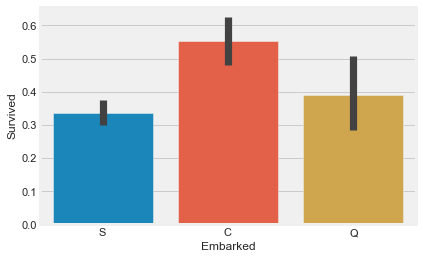

In [ ]:
sns.barplot(df['Embarked'], df['Survived']);

In [ ]:
df.groupby(['Embarked']).mean()

,PassengerId,Survived,Pclass,Fare,FamilySize
Embarked,,,,,
C,445.357143,0.553571,1.886905,59.954144,0.750000
Q,417.896104,0.389610,2.909091,13.276030,0.597403
S,449.527950,0.336957,2.350932,27.079812,0.984472


In [ ]:
df.groupby(['Embarked','Age'])['PassengerId'].count()

Embarked  Age  
C         Child     11
          Adult    104
          Elder     15
Q         Child      4
          Adult     21
          Elder      3
S         Child     54
          Adult    455
          Elder     45
Name: PassengerId, dtype: int64

In [ ]:
df.groupby(['Embarked','Sex'])['PassengerId'].count()

Embarked  Sex   
C         female     73
          male       95
Q         female     36
          male       41
S         female    203
          male      441
Name: PassengerId, dtype: int64

# Feature extraction

# Data preparation

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title
0,1,0,3,male,Adult,7.2500,S,1,Mr
1,2,1,1,female,Adult,71.2833,C,1,Mrs
2,3,1,3,female,Adult,7.9250,S,0,Miss
3,4,1,1,female,Adult,53.1000,S,1,Mrs
4,5,0,3,male,Adult,8.0500,S,0,Mr


In [ ]:
df.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Sex            category
Age            category
Fare            float64
Embarked         object
FamilySize        int64
Title          category
dtype: object

In [ ]:
df['Embarked'] = pd.Categorical(df['Embarked'])
df['Pclass'] = pd.Categorical(df['Pclass'])
df.dtypes

PassengerId       int64
Survived          int64
Pclass         category
Sex            category
Age            category
Fare            float64
Embarked       category
FamilySize        int64
Title          category
dtype: object

In [ ]:
df = pd.get_dummies(df, drop_first=1)  
df.head()

,PassengerId,Survived,Fare,FamilySize,Pclass_2,Pclass_3,Sex_male,Age_Adult,Age_Elder,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,1,0,7.2500,1,0,1,1,1,0,0,1,0,1,0,0
1,2,1,71.2833,1,0,0,0,1,0,0,0,0,0,1,0
2,3,1,7.9250,0,0,1,0,1,0,0,1,1,0,0,0
3,4,1,53.1000,1,0,0,0,1,0,0,1,0,0,1,0
4,5,0,8.0500,0,0,1,1,1,0,0,1,0,1,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X = df[df.loc[:, df.columns != 'Survived'].columns]
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

In [ ]:
from scipy.stats import boxcox
X_train_transformed = X_train.copy()
X_train_transformed['Fare'] = boxcox(X_train_transformed['Fare'] + 1)[0]
X_test_transformed = X_test.copy()
X_test_transformed['Fare'] = boxcox(X_test_transformed['Fare'] + 1)[0]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_transformed_scaled = scaler.fit_transform(X_train_transformed)
X_test_transformed_scaled = scaler.transform(X_test_transformed)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2).fit(X_train_transformed)
X_train_poly = poly.transform(X_train_transformed_scaled)
X_test_poly = poly.transform(X_test_transformed_scaled)

In [ ]:
print(poly.get_feature_names())

['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x0 x13', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x1 x13', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x2 x13', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x3 x13', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x4 x13', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x5 x13', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x6 x13', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x7 x13', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x8 x13', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x9 x13', 'x10^2', 'x10 x11', '

# Feature selection

In [ ]:
# Select features using chi-squared test
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
## Get score using original model
logreg = LogisticRegression(C=1)
logreg.fit(X_train, y_train)
scores = cross_val_score(logreg, X_train, y_train, cv=10)
print('CV accuracy (original): %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
highest_score = np.mean(scores)

CV accuracy (original): 0.816 +/- 0.036


In [ ]:
    ## Get score using models with feature selection
    for i in range(1, X_train_poly.shape[1]+1, 1):
        # Select i features
        select = SelectKBest(score_func=chi2, k=i)
        select.fit(X_train_poly, y_train)
        X_train_poly_selected = select.transform(X_train_poly)

        # Model with i features selected
        logreg.fit(X_train_poly_selected, y_train)
        scores = cross_val_score(logreg, X_train_poly_selected, y_train, cv=10)
        print('CV accuracy (number of features = %i): %.3f +/- %.3f' % (i, 
                                                                         np.mean(scores), 
                                                                         np.std(scores)))

        # Save results if best score
        if np.mean(scores) > highest_score:
            highest_score = np.mean(scores)
            std = np.std(scores)
            k_features_highest_score = i
        elif np.mean(scores) == highest_score:
            if np.std(scores) < std:
                highest_score = np.mean(scores)
                std = np.std(scores)
                k_features_highest_score = i

In [ ]:
print('Number of features when highest score: %i' % k_features_highest_score)